# Monte Carlo Simulation

We aim to simulate samples of star-disk systems in which some of them are perfectly aligned while others are not. Then by 1) sampling many thousands of these sysmtes, 2) adopting uncertainties based on our data, and 3) projecting the 3D (2D?) obliquities into the plane of the sky, we want to interpret our observations.

This code is build in collaboration with Siu, Wing-Yu; and it is largely based on C. Davies+ 2019(?) description.

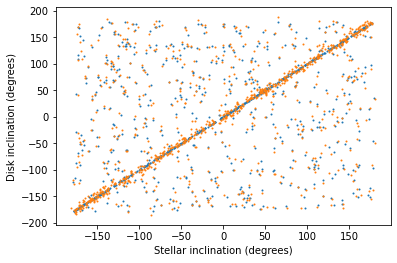

In [51]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Set sample size
sample_size = 10000

# Define function to simulate inclinations

def simulated_distributions(sample_size,alignment_fraction):
    """
    Here we define the sample of inclinations for star and disks.
    """
    # Determine number of aligned systems
    n_aligned = int(sample_size * alignment_fraction) 

    # Simulate inclinations for aligned systems
    inclinations_aligned = np.random.uniform(low=-180, high=180, size=n_aligned)
    
    # Simulate inclinations for randomly oriented systems
    inclinations_random_star = np.random.uniform(low=-180, high=180, size=sample_size - n_aligned)
    inclinations_random_disk = np.random.uniform(low=-180, high=180, size=sample_size - n_aligned)
    
    # Combine inclinations for aligned and randomly oriented systems
    inclinations_stellar = np.concatenate((inclinations_aligned, inclinations_random_star))
    inclinations_disc = np.concatenate((inclinations_aligned, inclinations_random_disk))
    
    return inclinations_stellar, inclinations_disc


def uncertain_distributions(true_inclinations_stellar,true_inclinations_disc):
    '''
    Here we add the uncertainty
    '''
    
    uncert_inclinations_stellar=np.empty(len(true_inclinations_stellar), dtype=float)
    uncer_inclinations_disc=np.empty(len(true_inclinations_disc), dtype=float)
    
    for ii, (true_inclinations_stellar,true_inclinations_disc) in enumerate(zip(true_inclinations_stellar,true_inclinations_disc)):
    
        uncert_inclinations_stellar[ii] = np.random.normal(loc = true_inclinations_stellar, scale= 2.0)
        uncer_inclinations_disc[ii] =  np.random.normal(loc = true_inclinations_disc, scale = 5.0) 
     
    return uncert_inclinations_stellar, uncer_inclinations_disc


def plot_histogram_distrubions(stellar,disk,nbins):

    fig, ax = plt.subplots()
    
    n,bins,patches=ax.hist([stellar,disk],bins=nbins,ec='k',rwidth=0.9)
    ax.set_ylabel('Numb. of sources',fontsize=14)
    ax.set_xlabel('obliquity',fontsize=14)

    plt.show()
    
def plot_distribution_comparison(*argv):
    """
    scatter plot the inclinations of different disk and stellar distributions
    """
    fig, ax = plt.subplots()

    for arg in argv:    
        ax.scatter(arg[0],arg[1], s=1)

    plt.xlabel('Stellar inclination (degrees)')
    plt.ylabel('Disk inclination (degrees)')
    plt.show()


if __name__ == "__main__":
    
#     Simulate inclinations for 100% aligned systems
    true_inclinations_stellar, true_inclinations_disc = simulated_distributions(sample_size=1000,alignment_fraction=0.5)
    
    uncert_incl_stellar, uncert_incl_disk = uncertain_distributions(true_inclinations_stellar, true_inclinations_disc)
    
    plot_distribution_comparison([true_inclinations_stellar, true_inclinations_disc],
                                 [uncert_incl_stellar, uncert_incl_disk])
    
